# Notebook Introduction

This notebook provides:
* Background on the project
* Imports and explores the data
* Cleans the data

# Data Background

Credit card companies want to be able to protect their clients by detecting fraudulent credit card transactions.  It should also be noted that being able to detect fraud in a timely manner is beneficial.
Lastly being too cautiious is not practical and would frustrate clients

The datasets contains transactions made by credit cards in **September 2013** by European cardholders. 

The dataset presents transactions that occurred in two days and is **highly imbalanced**.
* We have **492 frauds** out of **284,807 transactions**.
* The positive class (frauds) account for **0.172%** of all transactions.

The dataset contains only numerical input variables which are the result of a **PCA transformation**.
* Due to confidentiality issues, there are not provided the original features and more background information about the data.
* Features V1, V2, ... V28 are the principal components obtained with PCA;

The only features which have not been transformed with PCA are **Time** and **Amount**. 
* Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* Feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
* Feature **Class** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Project Outine

* Import Data
* Explore Data
    * Distribution of Class
    * Distribution of Amount
    * Distribution of observations over Time
        * Distribution of fraud observations over Time
* Clean 
    * NA Values
    * Duplicate Rows
* Save new clean_df

* Scale, T:t, SMOTE

# Library Imports

In [1]:
# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Scaling
from sklearn.preprocessing import RobustScaler

# Data Import & Exploration

<details><summary><strong>Data Information</strong></summary>
    <br>

* The features have all gone through a PCA transformation, except for "*Time*", "*Amount*" and "*Class*".
* We can assume that these altered features have also been scaled.
    </details>

<details><summary><strong>Exploration Summary</strong></summary>
    <br>

* The data is heavily imbalanced, with only 0.017% of observations being frauds
* Due to PCA (and its dimensionality reduction), there is very little correlation between features
* No Null Values
* The most common amount for a fraud was 1 (23%) followed by 0 (5.5%) and 99.99 (5.5%)
* The most common time for fraud seems to be 12 hours after the recordings start (presumably midday)
    </details>

In [2]:
df = pd.read_csv('../data/raw/creditcard.gz', compression='gzip', index_col=0)
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.923752e-15,5.559442e-16,-8.769520e-15,2.759583e-15,-1.549320e-15,2.005278e-15,-1.695447e-15,-1.933764e-16,-3.136288e-15,...,1.540693e-16,7.961936e-16,5.402018e-16,4.459446e-15,1.446667e-15,1.705578e-15,-3.668456e-16,-1.203990e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Histograms of all features

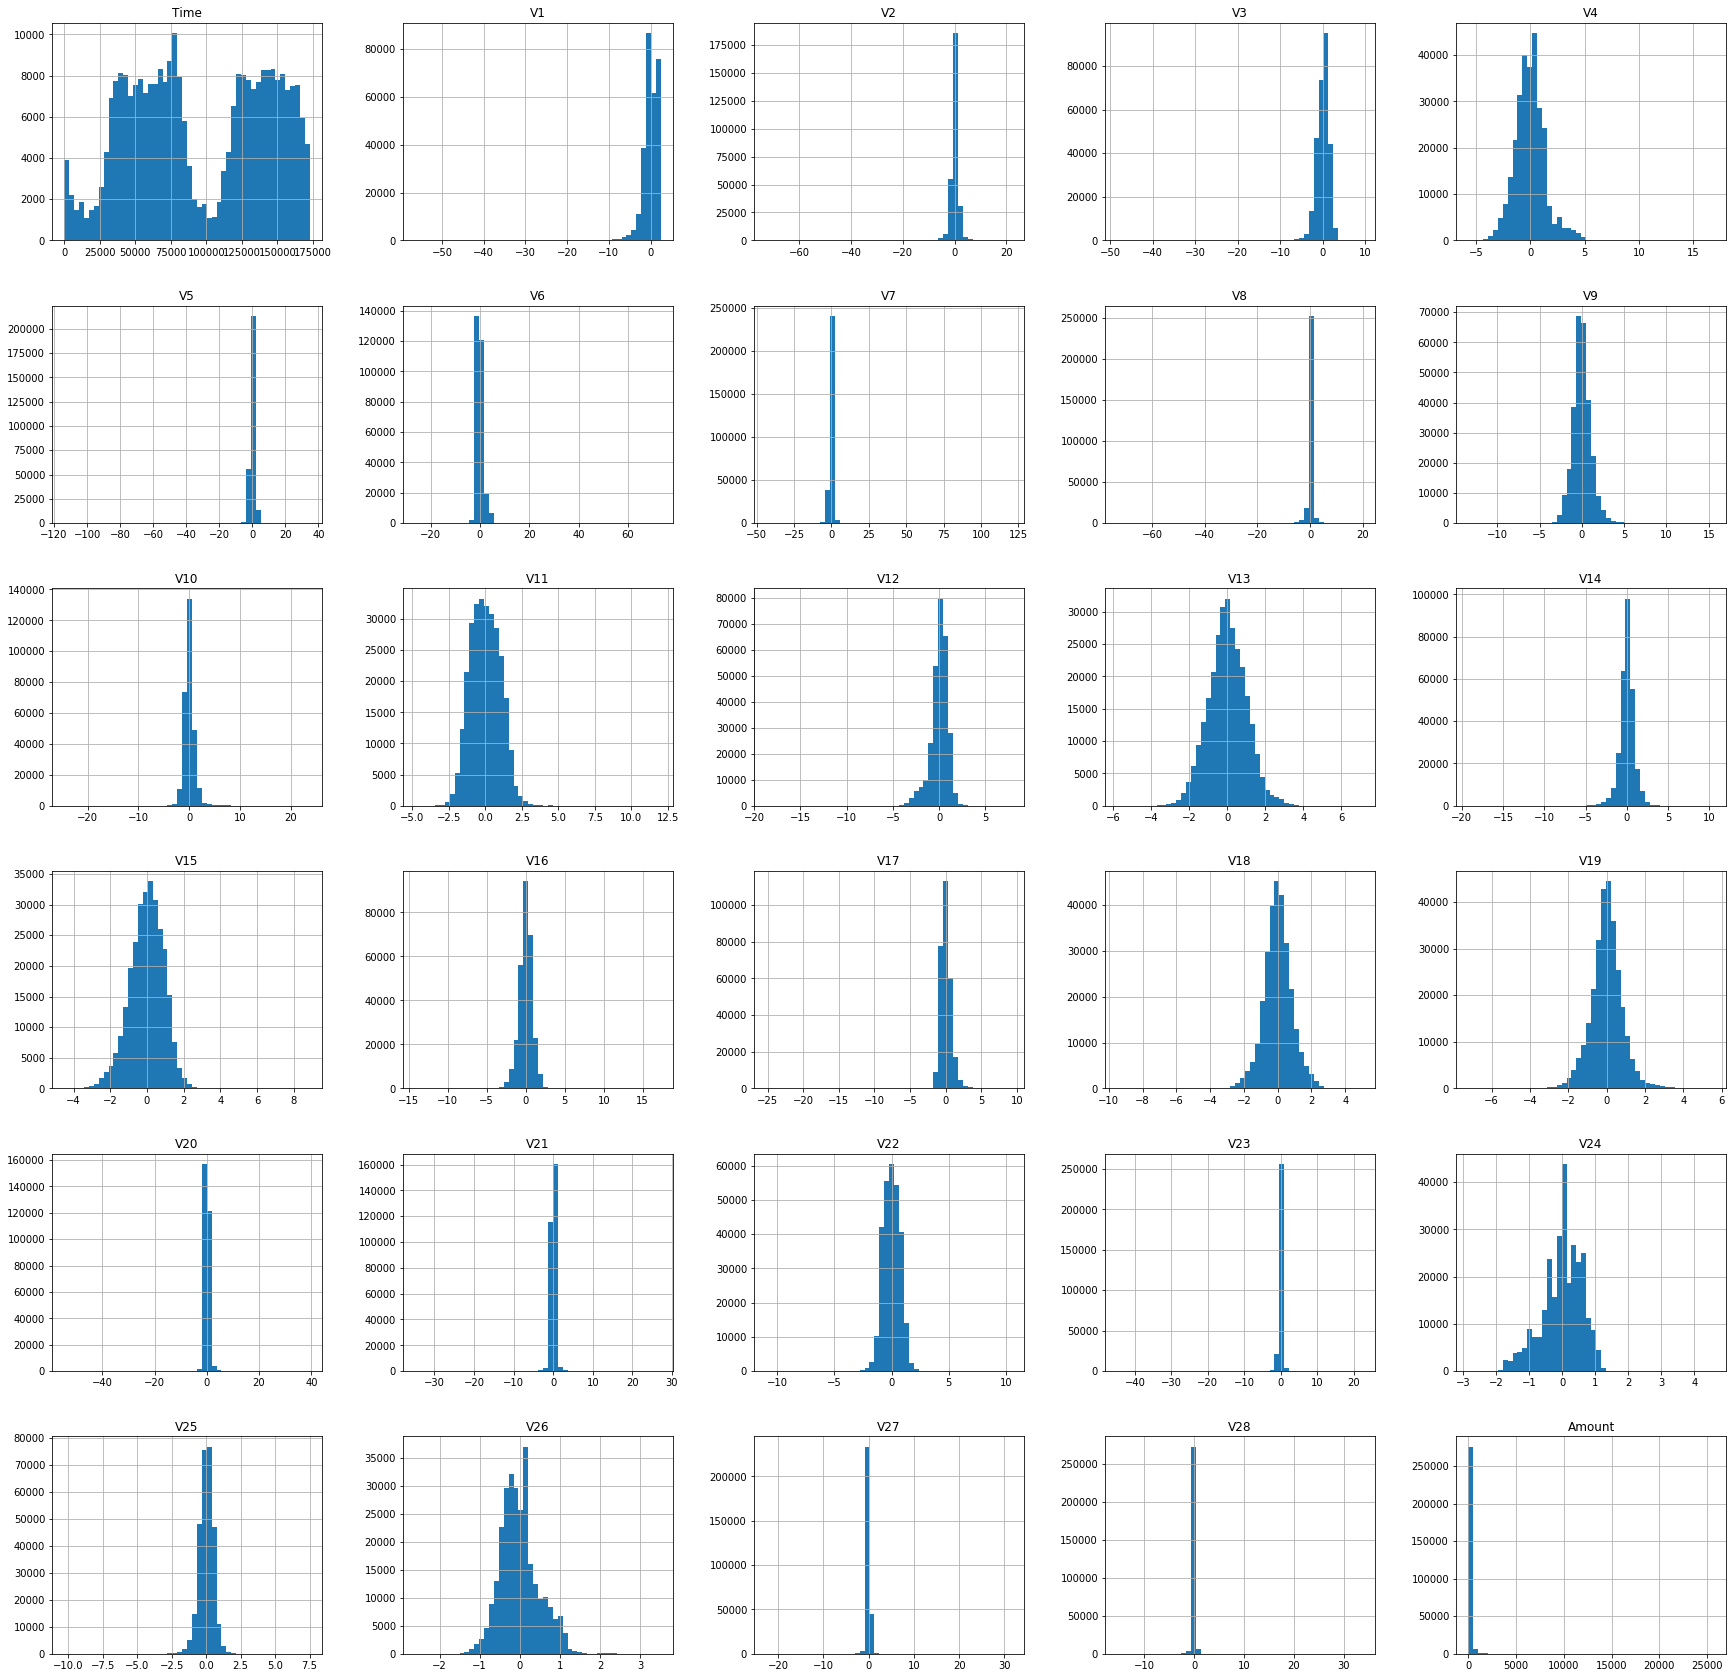

In [7]:
feat = df.loc[:, 'Time':'Amount'] # All the features
feat.hist(figsize=(30,30), bins=50);

## Heatmap of correlation between features

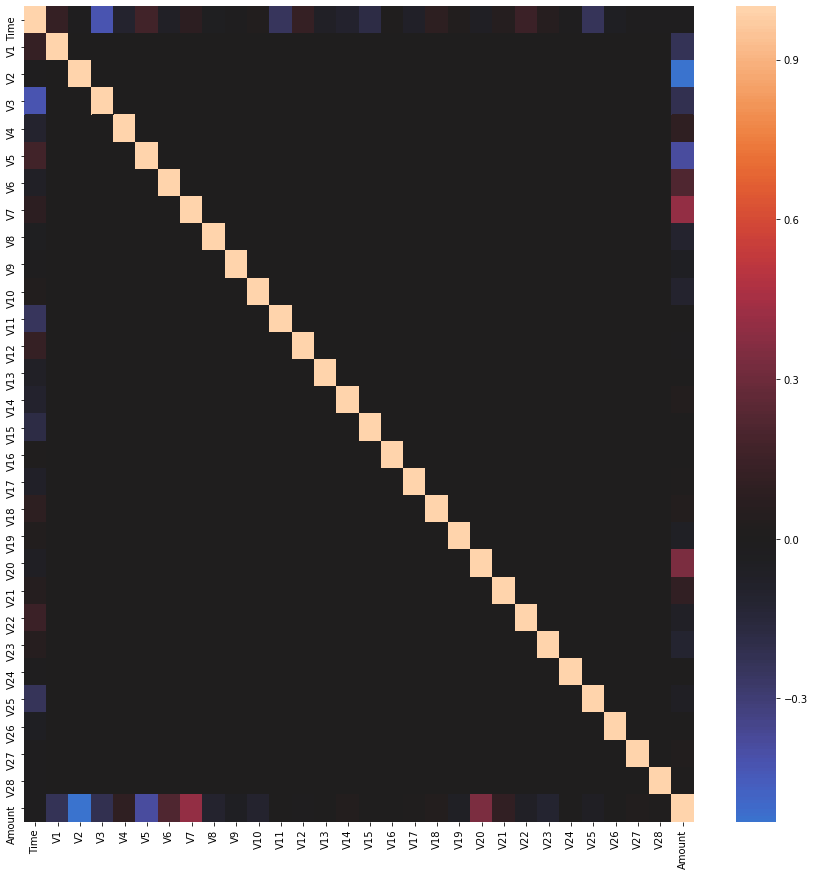

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(feat.corr(), center=0);

There is barely any correlation between the features as V1:V28 have been through PCA.

## Distribution of "Class" feature

In [9]:
non_fraud_pct= round(df['Class'].value_counts()[0]/len(df) * 100,2)
fraud_pct = round(df['Class'].value_counts()[1]/len(df) * 100,2)

print('Non-Fraud:\t{}%\nFraud:\t\t{}%'.format(non_fraud_pct, fraud_pct))

Non-Fraud:	99.83%
Fraud:		0.17%


* The classes are heavily imbalanced.
* If we simply use this distribution of Classes for our predictive models, the models will overfit.  
    * This will cause the models to assume that most cases are not fraud, however we want our model to be certain when a fraud occurs

## Distribution of "Amount" feature

### All transactions

Amount mean: 			88.35
Amount median: 			22.0
Amount mode: 			1.0
Amount max: 			25691.16
Transactions above 500 amount: 	9142 (0.03%)


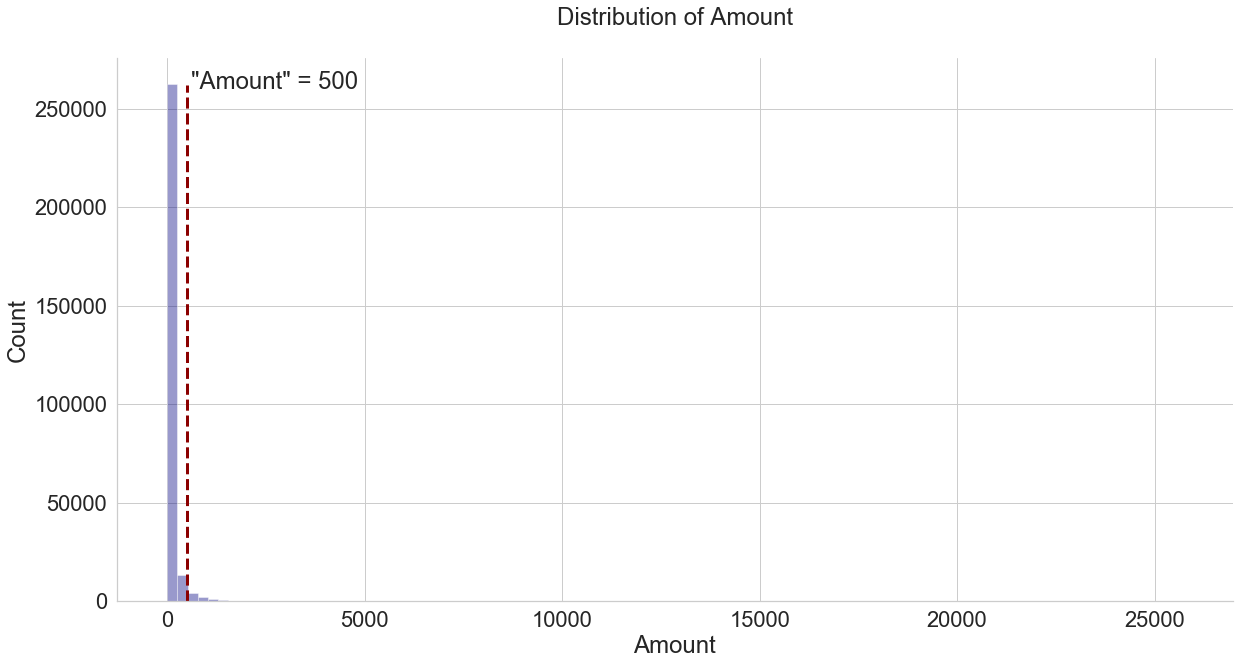

In [10]:
# Plot chart
plt.figure(figsize=(20,10))
sns.set(font_scale=2, style='whitegrid', )
ax = sns.distplot(df['Amount'],
                  bins=100,
                  kde=False,
                  color='navy');
ax.set_title('Distribution of Amount\n',);
plt.ylabel('Count')

# Useful statistics for chart
amount_mean = round(df['Amount'].mean(),2)
print('Amount mean: \t\t\t{}'.format(amount_mean))

amount_median = round(df['Amount'].median(),2)
print('Amount median: \t\t\t{}'.format(amount_median))

amount_mode = round(df['Amount'].mode()[0],2)
print('Amount mode: \t\t\t{}'.format(amount_mode))

amount_max = round(df['Amount'].max(),2)
print('Amount max: \t\t\t{}'.format(amount_max))

# Threshold to show skewed data
threshold = 500
transactions_above_threshold = (df['Amount']>threshold).sum()
pct_above_threshold = round(transactions_above_threshold / df['Amount'].count(), 
                            2)
print('Transactions above {} amount: \t{} ({}%)'.format(threshold,
                                                  transactions_above_threshold,
                                                       pct_above_threshold))

    # add in vertical threshold for chart
plt.axvline(x=threshold,
            ymax=0.95,
            ls= "--",
            lw=3,
            color='darkred',
            label='{} threshold'.format(threshold));
plt.text(threshold + 100,260000,'"Amount" = {}'.format(threshold),rotation=0)

sns.despine()

* 99.97% of transactions are below the 500 amount.  
* A box and whisker plot can also give us a visual of the distribution of the "*Amount*".

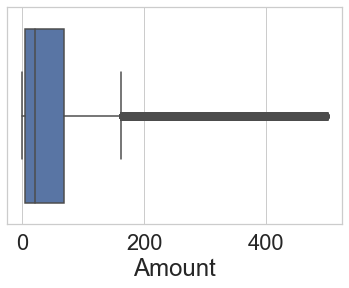

In [11]:
sns.boxplot(df[df['Amount']<threshold]['Amount']);

### Fraudulent transactions

Fraud Amount mean: 	122.21
Fraud Amount median: 	9.25
Fraud Amount mode: 	1.0


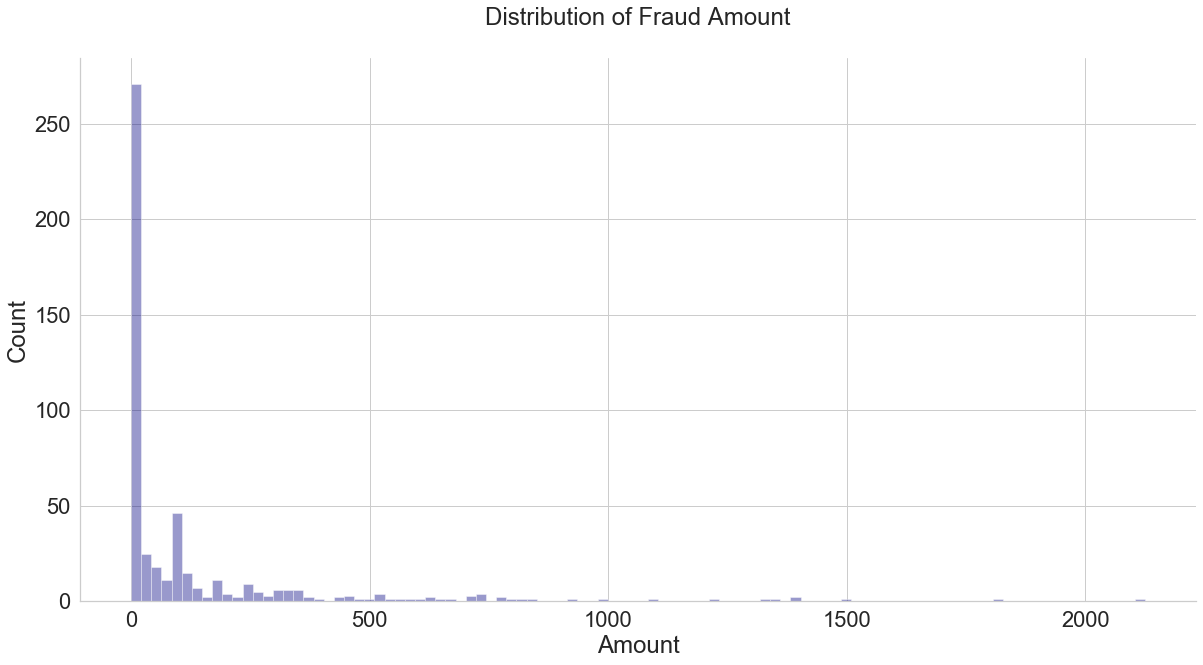

In [12]:
frauds = df['Amount'][df['Class']==1]

plt.figure(figsize=(20,10))
sns.set(font_scale=2, style='whitegrid')
ax = sns.distplot(frauds, 
                  bins=100, 
                  kde=False, 
                  color='navy');
ax.set_title('Distribution of Fraud Amount\n');
plt.ylabel('Count')

# plt.figure(figsize=(15,8))
# plt.hist(frauds, bins =50)

# # Title and axis
# plt.title('Histogram of Fraud Amounts')
# plt.xlabel('Fraud Amount')
# plt.ylabel('Count')

fraud_amount_mean = round(frauds.mean(),2)
print('Fraud Amount mean: \t{}'.format(fraud_amount_mean))

fraud_amount_median = round(frauds.median(),2)
print('Fraud Amount median: \t{}'.format(fraud_amount_median))

fraud_amount_mode = round(frauds.mode()[0],2)
print('Fraud Amount mode: \t{}'.format(fraud_amount_mode))

sns.despine()

* We can clearly see that the amount for fraud transaction are mostly below 500  
    * A closer inspection could show more detail on the most common ammounts

### Fraudulent transactions < 110

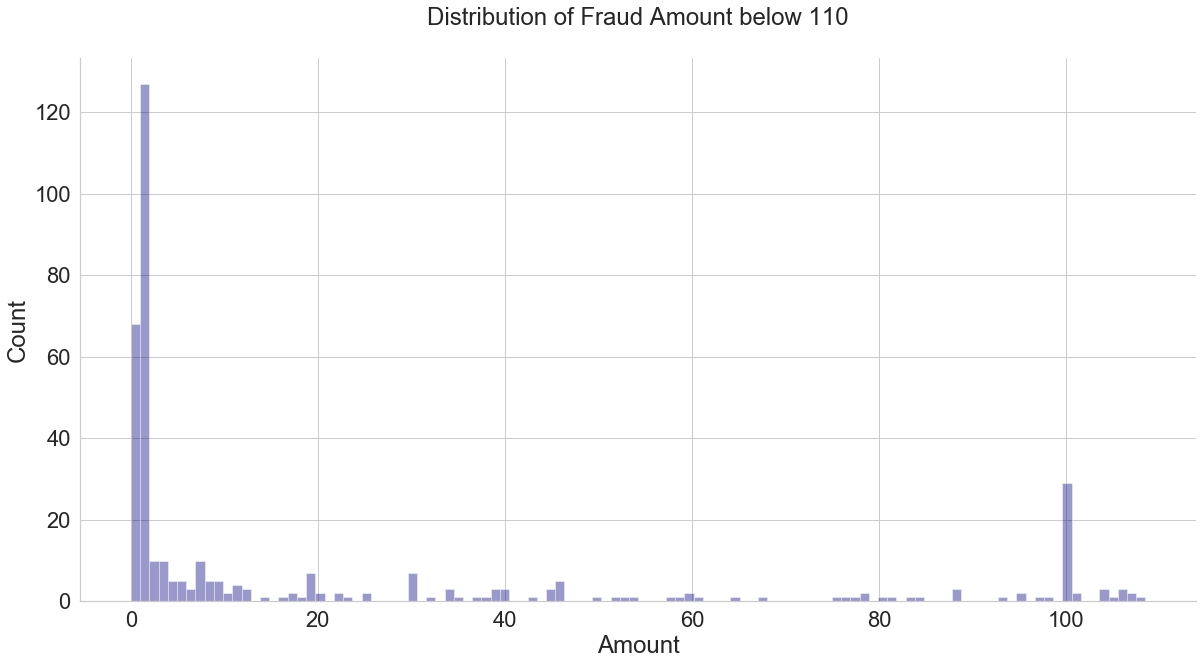

In [13]:
plt.figure(figsize=(20,10))

below_amount = 110
frauds_zoom = frauds[frauds < below_amount]
ax = sns.distplot(frauds_zoom, 
                  bins=below_amount, 
                  kde=False, 
                  color='navy');
ax.set_title('Distribution of Fraud Amount below {}\n'.format(below_amount));
plt.ylabel('Count')
sns.despine()

### Fraudulent transactions - most common Amounts

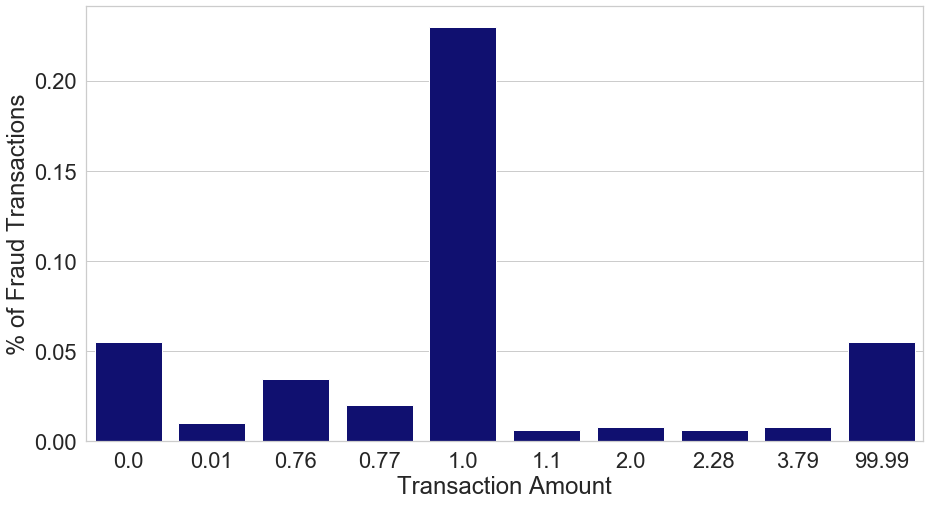

In [14]:
num_of_frauds = len(frauds)

# % of frauds at each amount
fraud_amount_pct = frauds.value_counts()/num_of_frauds
fraud_amount_pct.head(5)

n_results = 10
plt.figure(figsize=(15,8))
ax = sns.barplot(fraud_amount_pct.index[:n_results], fraud_amount_pct.head(n_results), color='navy');
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('% of Fraud Transactions');

* It appears that the amounts of 1, 0 and 99.99 are the most common amongst fraudulent transactions

## Distribution of observations over "Time"

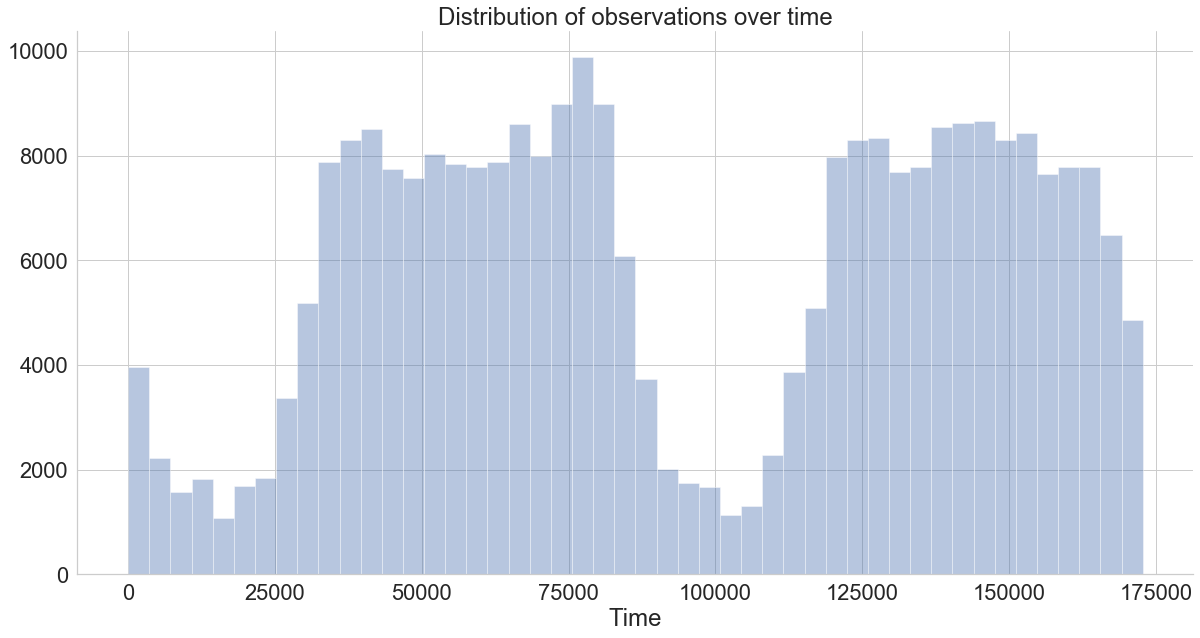

In [15]:
plt.figure(figsize=(20,10))

ax = sns.distplot(df['Time'], kde=False, bins=48);
ax.set_title('Distribution of observations over time');
sns.despine()

* We know from the Data Background that the observations were taken over the course of 2 days.  
* We can edit the "Time" for observations on day 2, to group the observations into 1 day. 
    * This will help to observe whether the time of day has an effect on fraud likelihood.

In [16]:
# Calculate seconds in a day
seconds_in_a_day = 60 * 60 * 24
print('There are {} seconds in a day'.format(seconds_in_a_day))

day_1 = df[df['Time']<seconds_in_a_day]
day_2 = df[df['Time']>=seconds_in_a_day]

# convert data from day 2, so it overlaps day 1
day_2['Time'] -= seconds_in_a_day

There are 86400 seconds in a day


/Users/adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
# concatenate the day 1 observations with day 2
df2 = pd.concat([day_1, day_2])

# Check if we have preserved all observations
df2.shape[0] == df.shape[0]

True

In [18]:
# Sort the new dataframe by the Time column
df2.sort_values(by=['Time'], inplace=True)

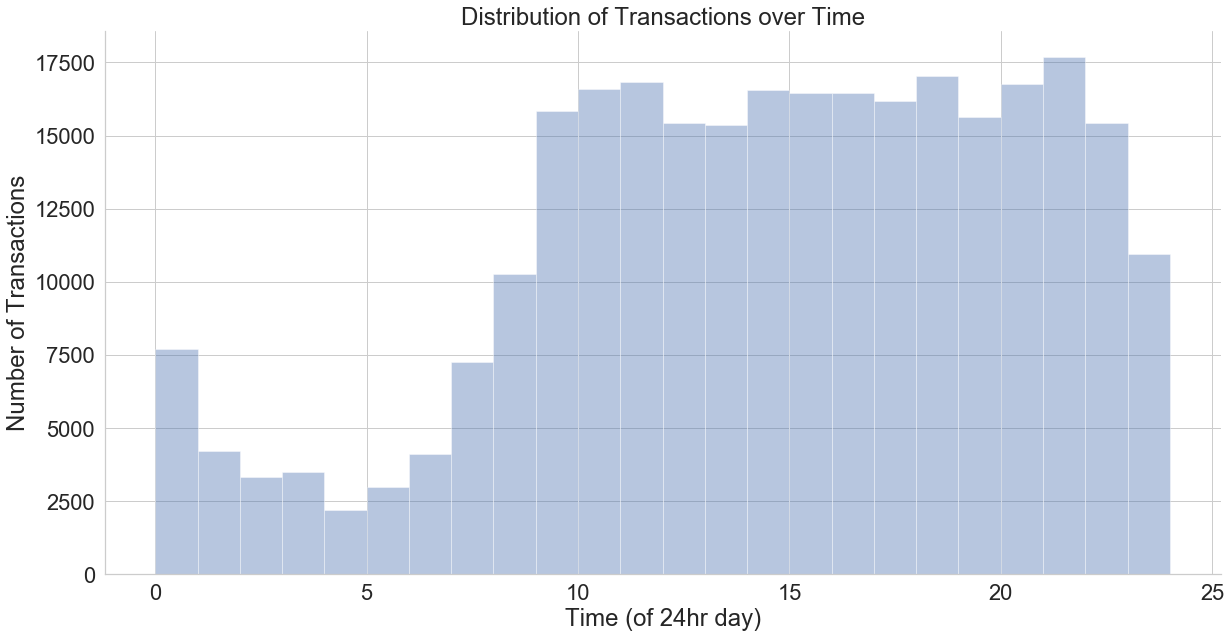

In [19]:
plt.figure(figsize=(20,10))

ax = sns.distplot(df2['Time']/3600, kde=False, bins=24);
title = 'Distribution of Transactions over Time'
ax.set_title(title);
plt.xlabel('Time (of 24hr day)')
plt.ylabel('Number of Transactions')
sns.despine()

plt.savefig('{}.png'.format(title), bbox_inches='tight')

* The chart above makes sense, with a dip during common sleeping hours, and transaction numbers increasing during the day time

### Distribution of fraud transactions over time

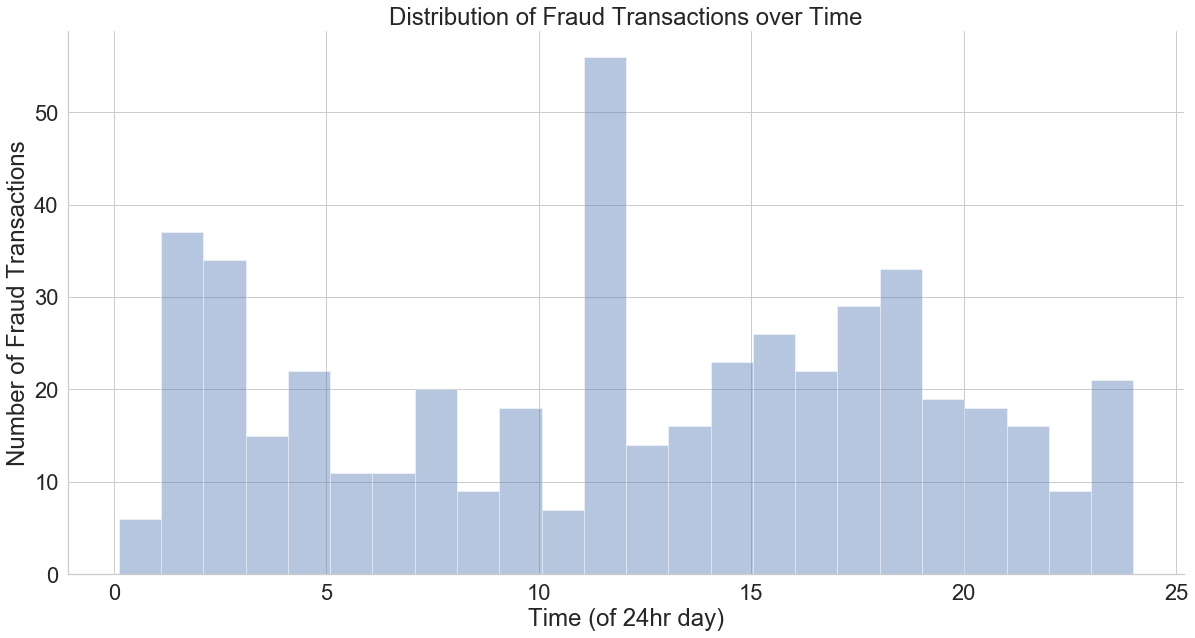

In [20]:
plt.figure(figsize=(20,10))

x = df2[df2['Class']==1]['Time']/3600
ax = sns.distplot(x, kde=False, bins=24);

title = 'Distribution of Fraud Transactions over Time'
ax.set_title(title);
plt.xlabel('Time (of 24hr day)')
plt.ylabel('Number of Fraud Transactions')
sns.despine()

plt.savefig('{}.png'.format(title), bbox_inches='tight')

* The most common hour of the day for fraud seems to be at midday

### Null Values

In [21]:
df.isnull().sum().sum()

0

* We can see there are no Null Values

# Data Cleaning

## Drop Duplicated Rows

In [22]:
df.duplicated().sum()

1081

In [23]:
df[df.duplicated(keep=False)].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0


* We should not drop the duplicated rows, as given the nature of credit card transactions, it is likely that a transaction was repeated within a short space of time, perhaps as it was declined initially.  

## Save Cleaned DataFrame

In [24]:
# Save our cleaned dataframe and compress it
df.to_csv('../data/processed/cleaned_dataframe.gz', index=0, compression='gzip')